In [110]:
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import math
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import precision_recall_fscore_support as prf

In [203]:
class GMM:
    def __init__(self,c1,c2,c3):
        self.GMM_c1 = GaussianMixture(n_components=8) 
        self.GMM_c1.fit(c1)
        self.GMM_c2 = GaussianMixture(n_components=8) 
        self.GMM_c2.fit(c2)
        self.GMM_c3 = GaussianMixture(n_components=8) 
        self.GMM_c3.fit(c3)
        
        
    def calcGMM(self,x,u,cov,w):
        s=0
        for i in range(len(w)):
            s += s + w[i] * self.calcBayes(x,u[i],cov[i])
        return s
    def calcBayes(self,x,u,cov):
        e=2.7183
        pi=3.142
        cov_inv=[[cov[1][1],-1*cov[0][1]],[-1*cov[1][0],cov[0][0]]]
        a=[x[0]-u[0],x[1]-u[1]]
        b=cov_inv[0][0]*a[0]+cov_inv[0][1]*a[1]
        c=cov_inv[1][0]*a[0]+cov_inv[1][1]*a[1]
        d=e**(-0.5*(a[0]*b+a[1]*c))
        f=(abs(cov[0][0]*cov[1][1]-cov[0][1]*cov[1][0]))**0.5
        p=(1/(2*pi*f))*d
        return p
    def classify(self, points):
        Y_predicted=[]
        self.Y_prob =[]
        for i in points:
            p1 = self.calcGMM(i,self.GMM_c1.means_, self.GMM_c1.covariances_,self.GMM_c1.weights_)
            p2 = self.calcGMM(i,self.GMM_c2.means_, self.GMM_c2.covariances_,self.GMM_c2.weights_)
            p3 = self.calcGMM(i,self.GMM_c3.means_, self.GMM_c3.covariances_,self.GMM_c3.weights_)
            s= max([p1,p2,p3])
            if p1>p2 and p1>p3:
                Y_predicted.append(1)
                self.Y_prob.append(p1)
            elif p2>p1 and p2>p3:
                Y_predicted.append(2)
                self.Y_prob.append(p2)
            else:
                Y_predicted.append(3)
                self.Y_prob.append(p3)
        
        return Y_predicted
            

In [204]:
d = pd.DataFrame({'x':[],'y':[],'class':[]})
df = pd.read_csv("./classification/linearlySeparable/class1_train.txt", header =None,delimiter = ' ')
c1 = c1 = np.array(df.values.tolist())
df = pd.read_csv("./classification/linearlySeparable/class2_train.txt", header =None,delimiter = ' ')
c2 = np.array(df.values.tolist())
df = pd.read_csv("./classification/linearlySeparable/class3_train.txt", header =None,delimiter = ' ')
c3 = np.array(df.values.tolist())
M = GMM(c1,c2,c3)
for i in range(len(c1)):
    d.loc[len(d.index)]=[c1[i][0],c1[i][1],1]
for i in range(len(c2)):
    d.loc[len(d.index)]=[c2[i][0],c2[i][1],2]
for i in range(len(c1)):
    d.loc[len(d.index)]=[c3[i][0],c3[i][1],3]


df = pd.read_csv("./classification/linearlySeparable/class1_test.txt", header =None,delimiter = ' ')
c1 = np.array(df.values.tolist())
df = pd.read_csv("./classification/linearlySeparable/class2_test.txt", header =None,delimiter = ' ')
c2 = np.array(df.values.tolist())
df = pd.read_csv("./classification/linearlySeparable/class3_test.txt", header =None,delimiter = ' ')
c3 = np.array(df.values.tolist())



In [207]:
#Graph plotting
mini = d.min()
maxi = d.max()

xgrid = np.arange(mini[0], maxi[0], 0.1)
ygrid = np.arange(mini[1], maxi[1], 0.1)
xx,yy=np.meshgrid(xgrid,ygrid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
g=np.array(M.classify(grid))
z=g.reshape(yy.shape)


<function matplotlib.pyplot.show(close=None, block=None)>

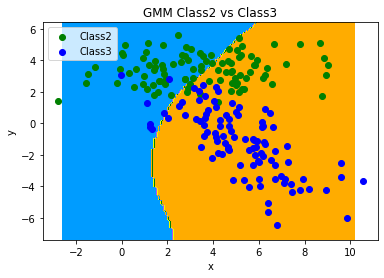

In [209]:
plt.contourf( xx,yy ,z, colors=['#009cff','#ebff00','#ffac00','#b055f1','g'])
plt.scatter(c1[:,0],c1[:,1],color='red',label='Class1')
plt.scatter(c2[:,0],c2[:,1],color='green',label='Class2')
plt.scatter(c3[:,0],c3[:,1],color='blue',label='Class3')
plt.xlabel('x')
plt.ylabel('y')
plt.title('GMM Test data Scatter Plot')
plt.legend()
plt.show

In [115]:
def metrics():
    #For cm and other values
    c4 = np.concatenate((c1,c2,c3))
    class1_freq = np.array(c1[:,0])
    for i in range(0,c1[:,0].size):
        class1_freq[i] = 1
    class2_freq = np.array(c2[:,0])
    for i in range(0,c2[:,0].size):
        class2_freq[i] = 2
    class3_freq = np.array(c3[:,0])
    for i in range(0,c3[:,0].size):
        class3_freq[i] = 3    
    class_freq = np.concatenate((class1_freq,class2_freq,class3_freq))

    #consusion matrix
    a=M.classify(c4)
    cm1 = cm(class_freq,a)

    #Other Required Values
    prf1 = prf(class_freq,a)
    precision = prf1[0]
    recall =prf1[1]
    f1_score = prf1[2]
    recall
    acc_counter = 0
    for i in range(0,class_freq.size):
        if class_freq[i]== a[i]:
            acc_counter += 1
    accuracy = (acc_counter)/(class_freq.size)
    print("Accuracy = " + str(accuracy))
    print("Precision = " + str(precision))
    print("Recall = " + str(recall))
    print("F1_Score = " + str(f1_score))
    


In [116]:
metrics()

Accuracy = 0.9933333333333333
Precision = [1.         0.98039216 1.        ]
Recall = [0.98 1.   1.  ]
F1_Score = [0.98989899 0.99009901 1.        ]


<function matplotlib.pyplot.show(close=None, block=None)>

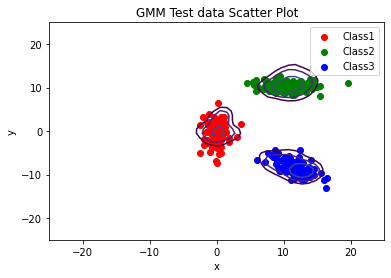

In [139]:
c = np.concatenate((c1,c2,c3))
# xgrid = np.arange(min(c[:,0])+2, max(c[:,0])+2, 2)
# ygrid = np.arange(min(c[0:,1])+2, max(c[:,1])+2, 2)
xgrid = np.linspace(-25.0,25.0)
ygrid = np.linspace(-25.0,25.0)
xx,yy=np.meshgrid(xgrid,ygrid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
ypred=M.classify(grid)
g=np.array(M.Y_prob)


# l=M.classify(x)
z=g.reshape(yy.shape)
plt.contour( xx,yy ,z , norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 15, 50))
plt.scatter(c1[:,0],c1[:,1],color='red',label='Class1')
plt.scatter(c2[:,0],c2[:,1],color='green',label='Class2')
plt.scatter(c3[:,0],c3[:,1],color='blue',label='Class3')
plt.xlabel('x')
plt.ylabel('y')
plt.title('GMM Test data Scatter Plot')
plt.legend()
plt.show


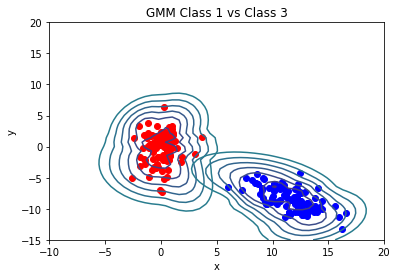

In [150]:
ypred=M.classify(c)
x = np.linspace(-10.0, 20.0)
y = np.linspace(-15.0, 20.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
plt.scatter(c1[:,0],c1[:,1],color='red',label='Class1')
#plt.scatter(c2[:,0],c2[:,1],color='green',label='Class2')
plt.scatter(c3[:,0],c3[:,1],color='blue',label='Class3')
plt.title("GMM Class 1 vs Class 3")
Z1 = -M.GMM_c1.score_samples(XX)
Z1 = Z1.reshape(X.shape)
plt.contour(
    X, Y, Z1, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 1.25, 10)
)
Z2 = -M.GMM_c2.score_samples(XX)
Z2 = Z2.reshape(X.shape)
# plt.contour(
#     X, Y, Z2, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 1.25, 10)
# )
#CB = plt.colorbar(CS, shrink=0.8, extend="both")
Z3 = -M.GMM_c3.score_samples(XX)
Z3 = Z3.reshape(X.shape)
plt.contour(
    X, Y, Z3, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 1.25,10)
)
plt.xlabel('x')
plt.ylabel('y')


plt.show()